# Objective
**- To classify the given disease normal pneumonia Tuberculosis universal_test**<br>
**- Multiclass classification problem**<br>

# Dependencies

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter


import tensorflow as tf


print(tf.__version__)
############ settings ############
data_dir = r"data"

batch_size = 32
img_height = 128
img_width = 128

2.17.0


# Data preprocessing

**- Loading and splitting data<br>**
**- Train:80% and Validation:20%**

In [2]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,

    validation_split=0.2,

    subset="training",

    seed=123,

    image_size=(img_height, img_width),

    batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,

    validation_split=0.2,

    subset="validation",

    seed=123,

    image_size=(img_height, img_width),

    batch_size=batch_size)

Found 18737 files belonging to 4 classes.
Using 14990 files for training.
Found 18737 files belonging to 4 classes.
Using 3747 files for validation.


# EDA

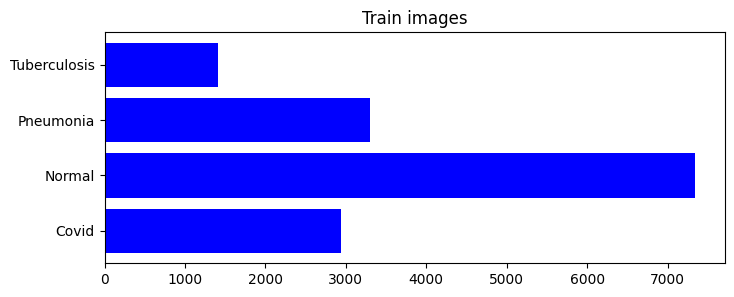

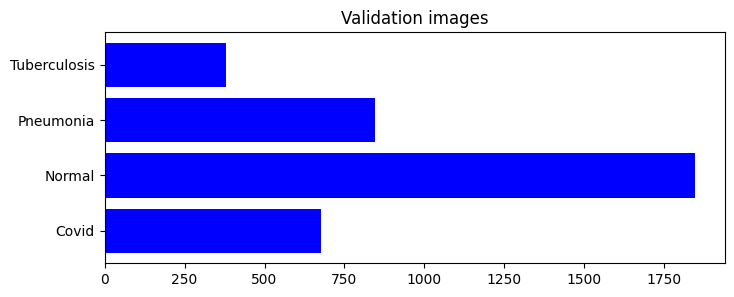

In [3]:
def plot_distribution(y, title):
    a = Counter(y)
    y = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']

    x = [a[i] for i in range(4)]
    plt.figure(figsize=(8, 3))
    plt.barh(y, x, color='blue')
    plt.title(title)
    return plt.show()


y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title="Validation images")

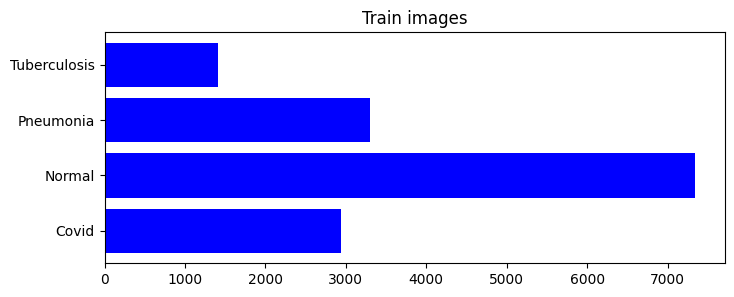

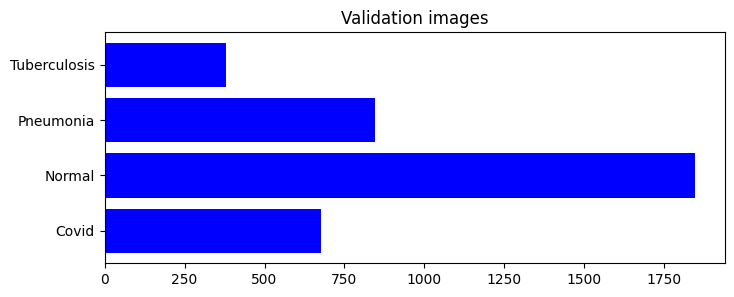

In [4]:
# Target distribution

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title="Validation images")

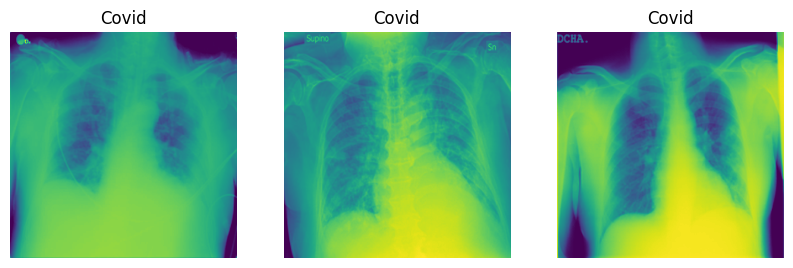

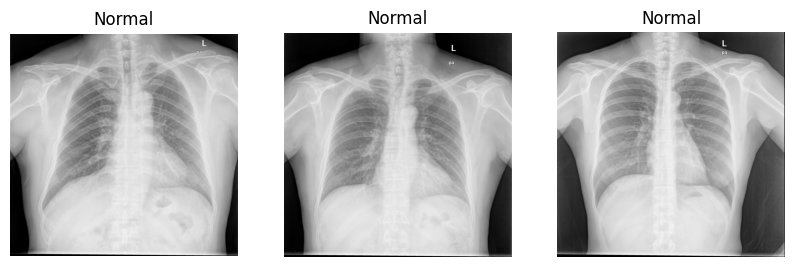

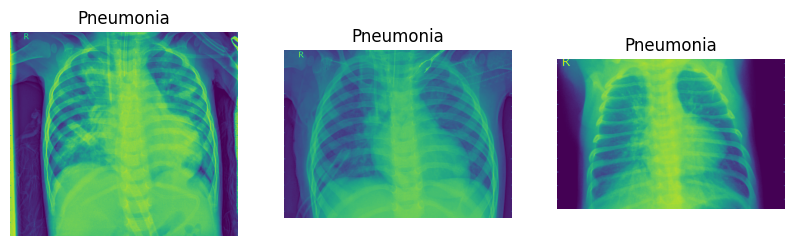

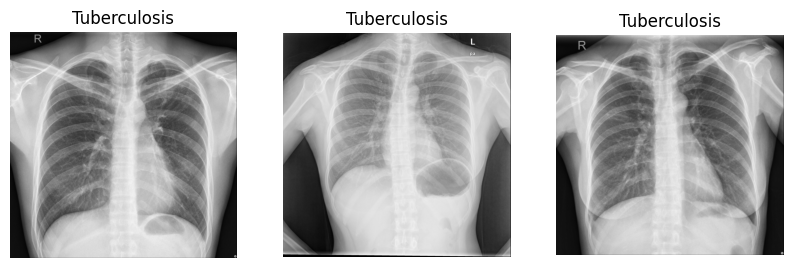

In [5]:
# Sample images
class_names = train_ds.class_names

for class_name in class_names:
    imgs = os.listdir(os.path.join(data_dir, class_name))[:3]
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(imgs):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(plt.imread(os.path.join(data_dir, class_name, img)))
        plt.title(class_name)
        plt.axis('off')